In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the parameters of materials
# for light
A = 1  # intial Amplitude
lambda_ = 0.3e-3  # Wavelength in meters
f = 1e12  # Frequency in hertz, using 1 THz for this example
k = 2 * np.pi / lambda_  # Wave number in vacuum
omega = 2 * np.pi * f  # Angular frequency

# for silicon wafer
f = 1e12  # Frequency, using 1 THz for this example
d = 1e-3  # Thickness of the silicon wafer
alpha = 0.01  # Absorption coefficient (not given, assuming for this example)
n_2 = 2.113  # Refractive index of silicon wafer
R_1 = R_2 = 0.309  # Reflectance Si/vacuum
T_1 = T_2 = 1 - R_1  # Transmittance Si/vacuum

### Plane Wave Solution

   For a lossless medium, the fundamental solution of electromagnetic waves is the plane wave solution as the incident light, given in general form by:
  $$E_{in}(t, x) = A \exp[i(kx - \omega t)]$$
  $\qquad$ where, $A$ is the amplitude, $k$ is the wave number, and $\omega$ is the angular frequency.

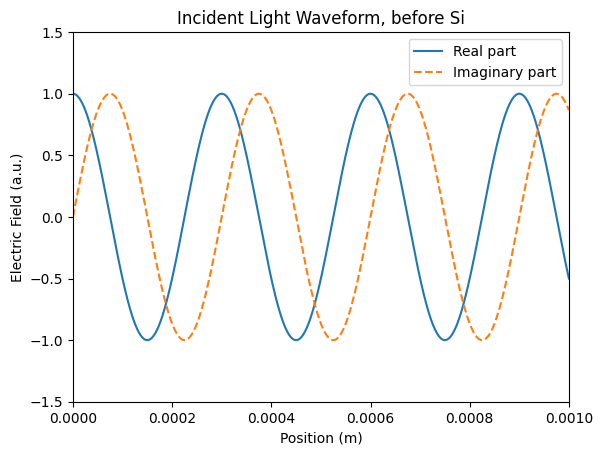

In [3]:
# Incident light
#num_periods = 1  # Number of periods to display
x = np.linspace(0, 0.001, 1000)  # Define position within multiple wavelengths
t = 0  # Initial time
# Calculate the electric field
E_in = A * np.exp(1j * (k * x - omega * t))

# Plotting
plt.plot(x, E_in.real, label='Real part')
plt.plot(x, E_in.imag, linestyle='dashed', label='Imaginary part')
plt.xlabel('Position (m)')
plt.ylabel('Electric Field (a.u.)')
plt.title('Incident Light Waveform, before Si')
plt.xlim(0, 0.001)  # Adjust the x-axis range to display multiple periods
plt.ylim(-1.5, 1.5)  # Adjust the y-axis range to display multiple periods
plt.legend(loc='upper right')
plt.show()

  ### Consider the absorborption in media
  In real physical environments, many media absorb electromagnetic waves, leading to their gradual attenuation during propagation. This attenuation can often be described by an exponential decay factor, where $\alpha$ can be considered as the decay coefficient or absorption coefficient. It determines the rate at which the electromagnetic wave attenuates in the medium. Thus, considering absorption, the equation becomes:
  
   $$E_{out_2}(t, x) = A \exp(-\alpha kx) \exp[-i(\omega t - nkx)] \tag{1}$$
  

This equation comprehensively considers the effects of both refraction and absorption on the propagation of electromagnetic waves, where $n$ and $\alpha$ respectively describe the degree of impact of refraction and absorption on the electromagnetic wave. In specific application scenarios, these two parameters might be determined by experimental data, material properties, etc.

(0.6910000000000001+0j)
0.6910000000000001
(0.5397830205272295+0.15071012729863004j)
0.5604277399628508


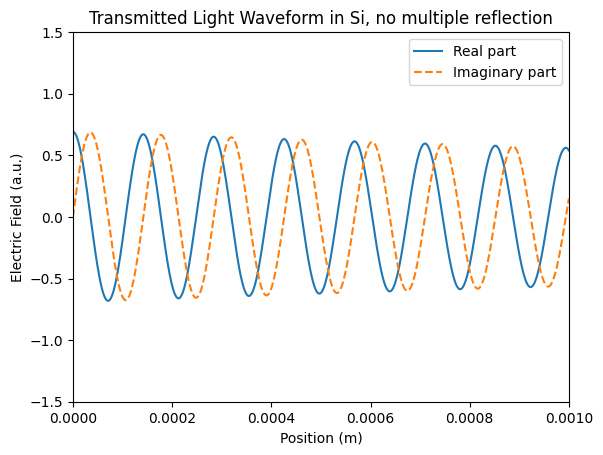

In [4]:
#the decay in silicon, no consideration of multiple reflection
#note here to avoid the confusion, multiple reflection is not considered
# Define constants
# Define position and time
x = np.linspace(0, 0.001, 1000)
t = 0 # Initial time, can be changed to see the effect of time
# Calculate the electric field
E_inSi = T_1*A* np.exp(-alpha * k * x) * np.exp(-1j * (omega * t - n_2 * k * x)) #T_1 is the initial amplitude going to the silicon wafer after the 1st reflection
print(E_inSi[0])
print(np.abs(E_inSi[0]))
print(E_inSi[-1])
print(np.abs(E_inSi[-1]))
# Plotting
plt.plot(x, E_inSi.real, label='Real part')
plt.plot(x, E_inSi.imag, linestyle='dashed', label='Imaginary part')
plt.xlabel('Position (m)')
plt.ylabel('Electric Field (a.u.)')
plt.title('Transmitted Light Waveform in Si, no multiple reflection')
plt.xlim(0, 0.001)  
plt.ylim(-1.5, 1.5) 
plt.legend(loc='upper right')
plt.show()

**Let's consider Hai's question.**



![Alt text](task1.jpg)


Light travels from media 1 to media 2 to media 3. And the interfaces between those media are flat. And light is perpendicular to the interfaces. If the media 1, 2 and 3 have refractive indices $n_1$, $n_2$ and $n_3$, respectively, we can use the Fresnel equations to find the reflectance and transmittance at each interface, but with different expressions. For light incident from a medium with refractive index $n_1$ to another medium with refractive index $n_2$, the reflectance $R$ and transmittance $T$ are given by:

\begin{equation*}
R = \left( \frac{n_1 - n_2}{n_1 + n_2} \right)^2 \tag{2}
\end{equation*}

\begin{equation*}
T = 1 - R = \frac{4n_1n_2}{(n_1 + n_2)^2} \tag{3}
\end{equation*}

- **At the first interface (between media 1 and 2):**

    $R_1 = \left( \frac{n_1 - n_2}{n_1 + n_2} \right)^2$ 
    $\\$
    $T_1 = \frac{4n_1n_2}{(n_1 + n_2)^2}$

- **At the second interface (between media 2 and 3):**

    $R_2 = \left( \frac{n_2 - n_3}{n_2 + n_3} \right)^2$
    $\\$
    $T_2 = \frac{4n_2n_3}{(n_2 + n_3)^2}$


The light undergoes multiple reflections within medium 2, so the total electric field of the transmitted light is the sum of the electric fields of all these waves. This can be represented by the following convergent geometric series:

\begin{equation*}
E_{out_3}(t, x) = T_1 \cdot T_2 \cdot E_{out_2}(t, x) \sum_{n=0}^{\infty} (R_1 \cdot R_2)^n
\end{equation*}

The sum of this series is:

\begin{equation*}
\sum_{n=0}^{\infty} (R_1 \cdot R_2)^n = \frac{1}{1 - R_1 \cdot R_2}
\end{equation*}

Therefore, the expression for the electric field of the transmitted light is:


\begin{equation*}
E_{out_3}(t, x) = \frac{T_1 \cdot T_2}{1 - R_1 \cdot R_2} \cdot A \exp(-\alpha kx) \exp[-i(\omega t - n_2 kx)]
\end{equation*}

The media 2 is a 1 mm thick Si wafer. Media 1 and media 3 are vacuum.  And the frequency of light is 1 THz. $\lambda$ = 0.3 mm.

Given that medium 2 is a 1 mm thick silicon wafer with a refractive index $n_2 = 2.113$, and media 1 and 3 are vacuum with a refractive index $n_1 = n_3 = 1$, we can substitute these values into our formulas. Therefore, $R_1 = R_2 \approx 0.309$, and $T_1 = T_2 = 1 - R_1 \approx 0.691$.

here, $x = d$ = 0.001 m, the thickness of Si wafer; $k = \frac{2\pi}{\lambda} \approx 209.44$.

The total transmitted electric field $E_{\text{out}}(t, x)$ is:
$$E_{out_3}(t, d)\approx0.528A \exp(-0.20944\alpha) \exp[-i(\omega t - 0.44255)]$$

(0.27124561465802993+0.07573313638946645j)
new amplitude is 0.28161976389912335


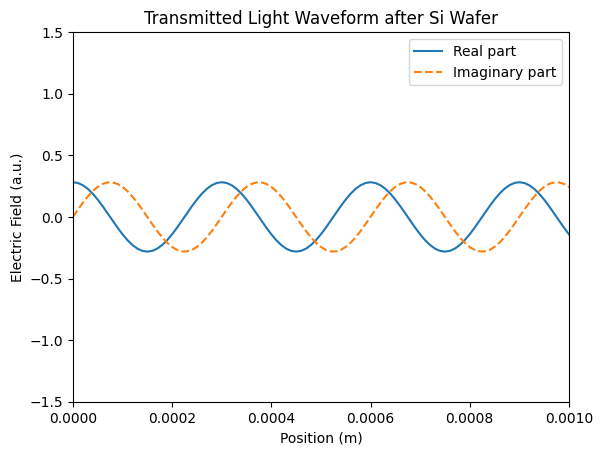

In [5]:
#the waveform after Si Wafer
# note here, multiple reflection is considered
# Define position and time
x = np.linspace(0, 0.01, 1000)
t = 0  # Initial time

# Given constants for the silicon wafer
n_2 = 2.113  # Refractive index of silicon wafer
R_1 = R_2 = 0.309  # Reflectance
T_1 = T_2 = 1 - R_1  # Transmittance
alpha = 0.03  # Absorption coefficient (not given, assuming non-absorbing for this example)

# Calculate the electric field
E_out_3_0 = (T_1 * T_2 / (1 - R_1 * R_2)) * np.exp(-alpha * k * d) * np.exp(-1j * (omega * t - n_2 * k * d)) #considering the multiple reflection
print(E_out_3_0)
amplitude = np.abs(E_out_3_0) #the amplitude of the transmitted light after the Si wafer
print("new amplitude is", amplitude)
E_out_3 = amplitude * np.exp(1j * (k * x - omega * t))

# Plotting
plt.plot(x, E_out_3.real, label='Real part')
plt.plot(x, E_out_3.imag, linestyle='dashed', label='Imaginary part')
plt.xlabel('Position (m)')
plt.ylabel('Electric Field (a.u.)')
plt.title('Transmitted Light Waveform after Si Wafer')
plt.legend(loc='upper right')
plt.xlim(0, 0.001)  # Adjust the x-axis range to display multiple periods
plt.ylim(-1.5, 1.5)  # Adjust the y-axis range to display multiple periods
plt.show()


### Update 2. 22/09/2023, Additional phase \(\Delta\phi\), another way to calculate additional phase

This expression \(\Delta \phi = \frac{2\pi m_2 d}{\lambda}\) describes the additional phase shift \(\Delta \phi\) incurred when light passes through a medium of thickness \(d\) with a refractive index \(m_2\), where \(\lambda\) is the wavelength of light in vacuum. The derivation of this expression is as follows:

- **Relationship between Phase Velocity and Refractive Index:**

    The speed of light in vacuum is \(c\), and the speed of light in the medium is \(v\). Their relationship is given by:
    $$ v = \frac{c}{n_2} $$
    
- **Wavelength Change:**
    
    When light enters the medium, its frequency \(f\) remains constant, but due to the decrease in speed, the wavelength \(\lambda'\) in the medium gets shortened, and the relationship is:
    $$ \lambda' = \frac{v}{f} = \frac{c}{n_2 f} = \frac{\lambda}{n_2} $$
    
- **Calculation of Phase Difference:**
    
    The light travels a distance \(d\) in the medium, and the phase shift \(\Delta \phi\) in this distance is the wave number \(k'\) in the medium multiplied by the distance \(d\), i.e.,
    $$ \Delta \phi = k' \cdot d $$
    
    The definition of the wave number \(k'\) in the medium is:
    $$ k' = \frac{2\pi}{\lambda'} = \frac{2\pi n_2}{\lambda} $$
    
    Substituting into the expression for \(\Delta \phi\), we get:
    $$ \Delta \phi = \frac{2\pi n_2}{\lambda} \cdot d = \frac{2\pi n_2 d}{\lambda} $$

Hence, through this derivation, we obtain \(\Delta \phi = \frac{2\pi n_2 d}{\lambda}\).
The additional phase \(\Delta\phi\) is:
$$ \Delta\phi \approx 44.270 \text{ radians} $$
